# Survival Analysis for DD Dataset

The dataset is based on the Democracy Dictatorship Index. The dataset is included in the lifeline package.<br>
Wikipedia: https://en.wikipedia.org/wiki/Democracy-Dictatorship_Index

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#!pip install tabulate
import pandas as pd
import numpy as np
import copy
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from IPython.display import display

# lifelines
from lifelines import NelsonAalenFitter, CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.datasets import load_dd # dataset

In [2]:
df = load_dd()
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [3]:
kmf = KaplanMeierFitter()

## Survival Curve

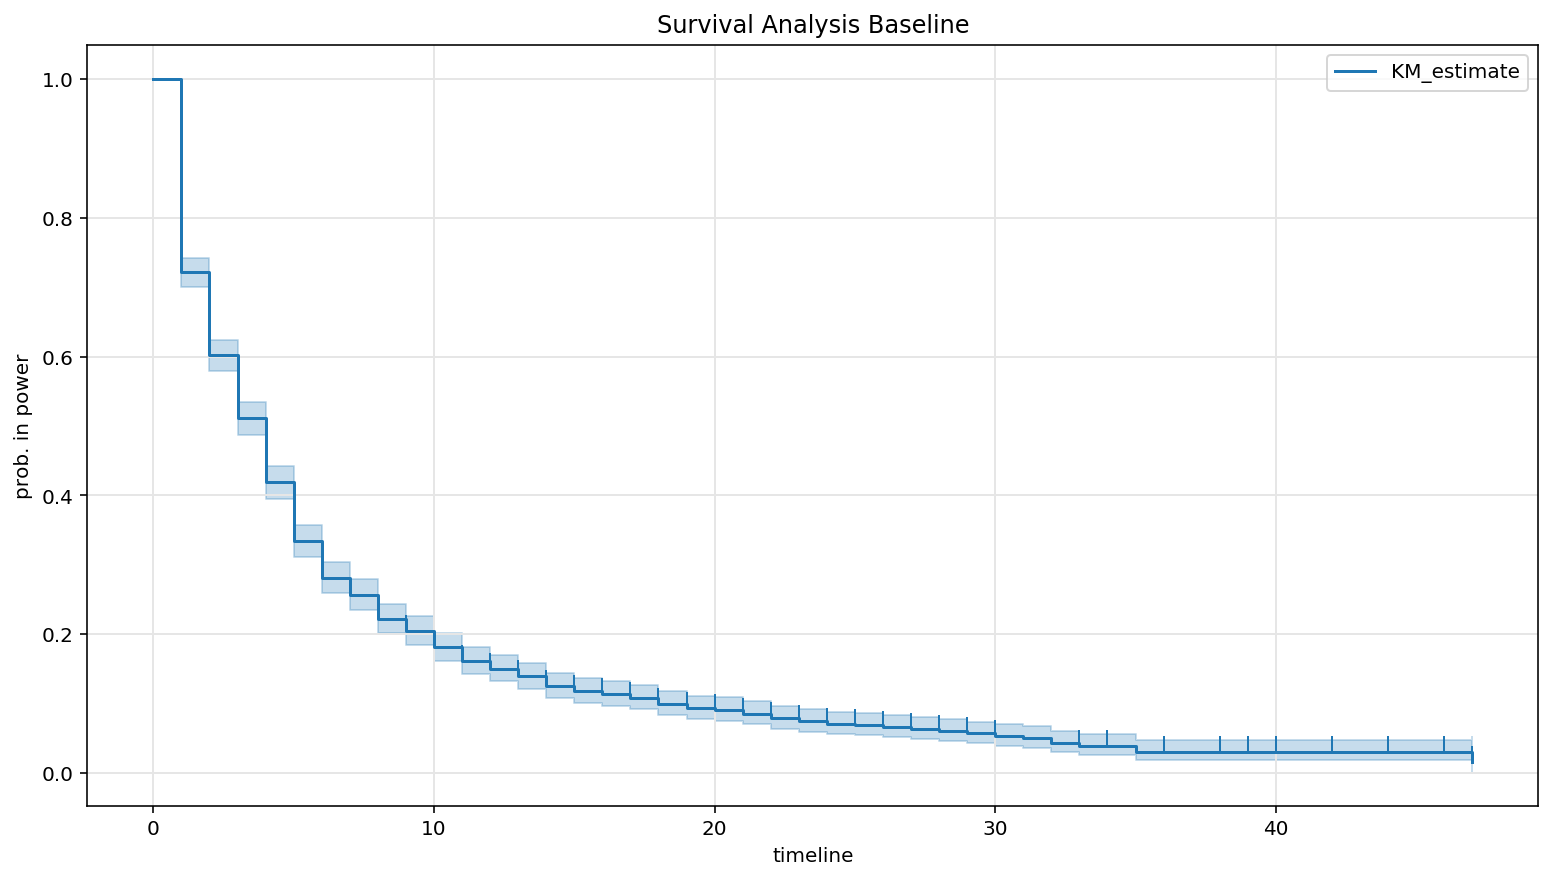

In [4]:
# define: T as time column, E as the event column, t as the window
T = df['duration']
E = df['observed']
# t = np.linspace(0, 20)

# lifelines api, similar to sklearn
kmf.fit(T,E,
#        timeline=t
       )

# visualize
kmf.plot(figsize=(13, 7),
          show_censors=True, 
          censor_styles={'marker': 2,'ms': 8,'mew':1},
         )
plt.grid(True, lw = 1, ls = '-', c = '.9')
plt.ylabel('prob. in power')
plt.title('Survival Analysis Baseline')
plt.show()

## Survival Curve with Stationary Feature

### Regime

In [5]:
df['regime'].unique()

array(['Monarchy', 'Civilian Dict', 'Military Dict', 'Parliamentary Dem',
       'Presidential Dem', 'Mixed Dem'], dtype=object)

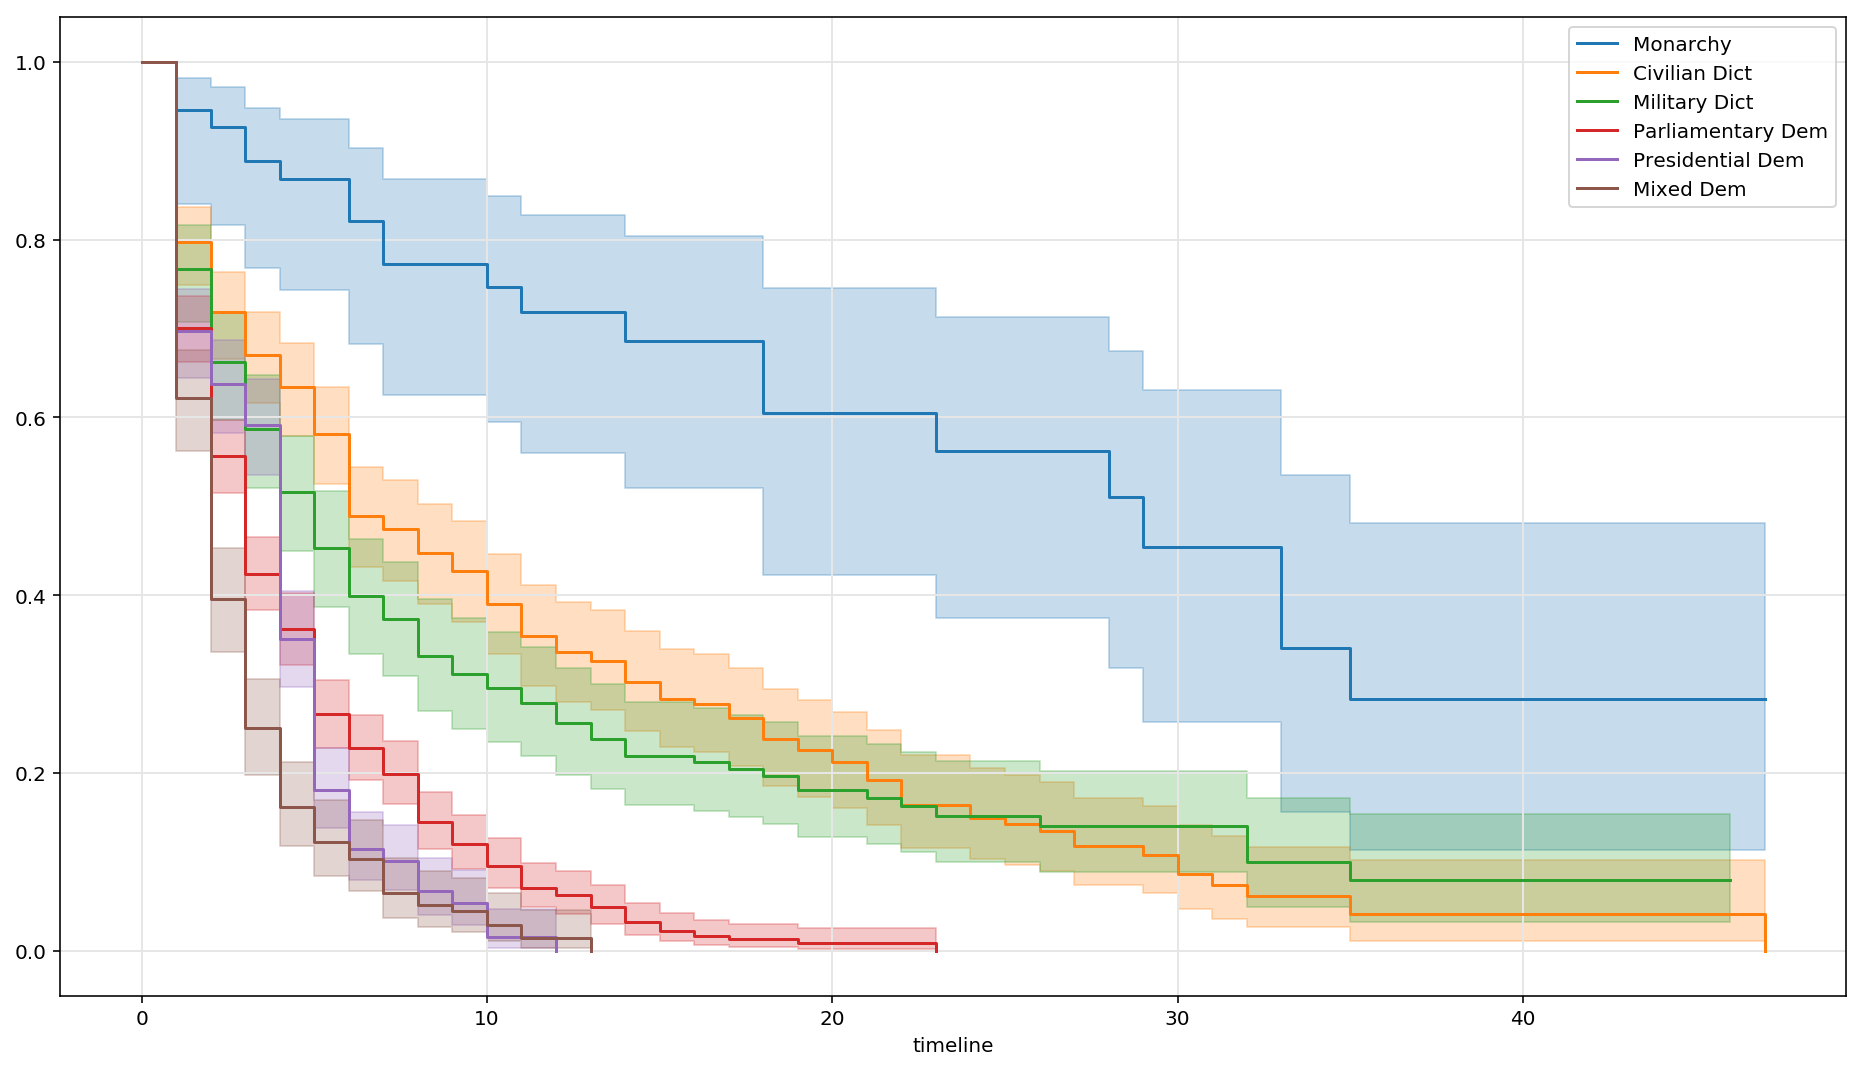

In [6]:
# plot survival curves for each regime
# subsetting regimes and plot multiple survival curves respectively
ax = subplot(111)
for r in df['regime'].unique()[:]:
    ix = df['regime'] == r
    kmf.fit(T.loc[ix],E.loc[ix],label=r)
    kmf.plot(figsize=(16, 9),ax=ax)
    plt.grid(True, lw = 1, ls = '-', c = '.9')

### Continent

In [7]:
df['un_continent_name'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

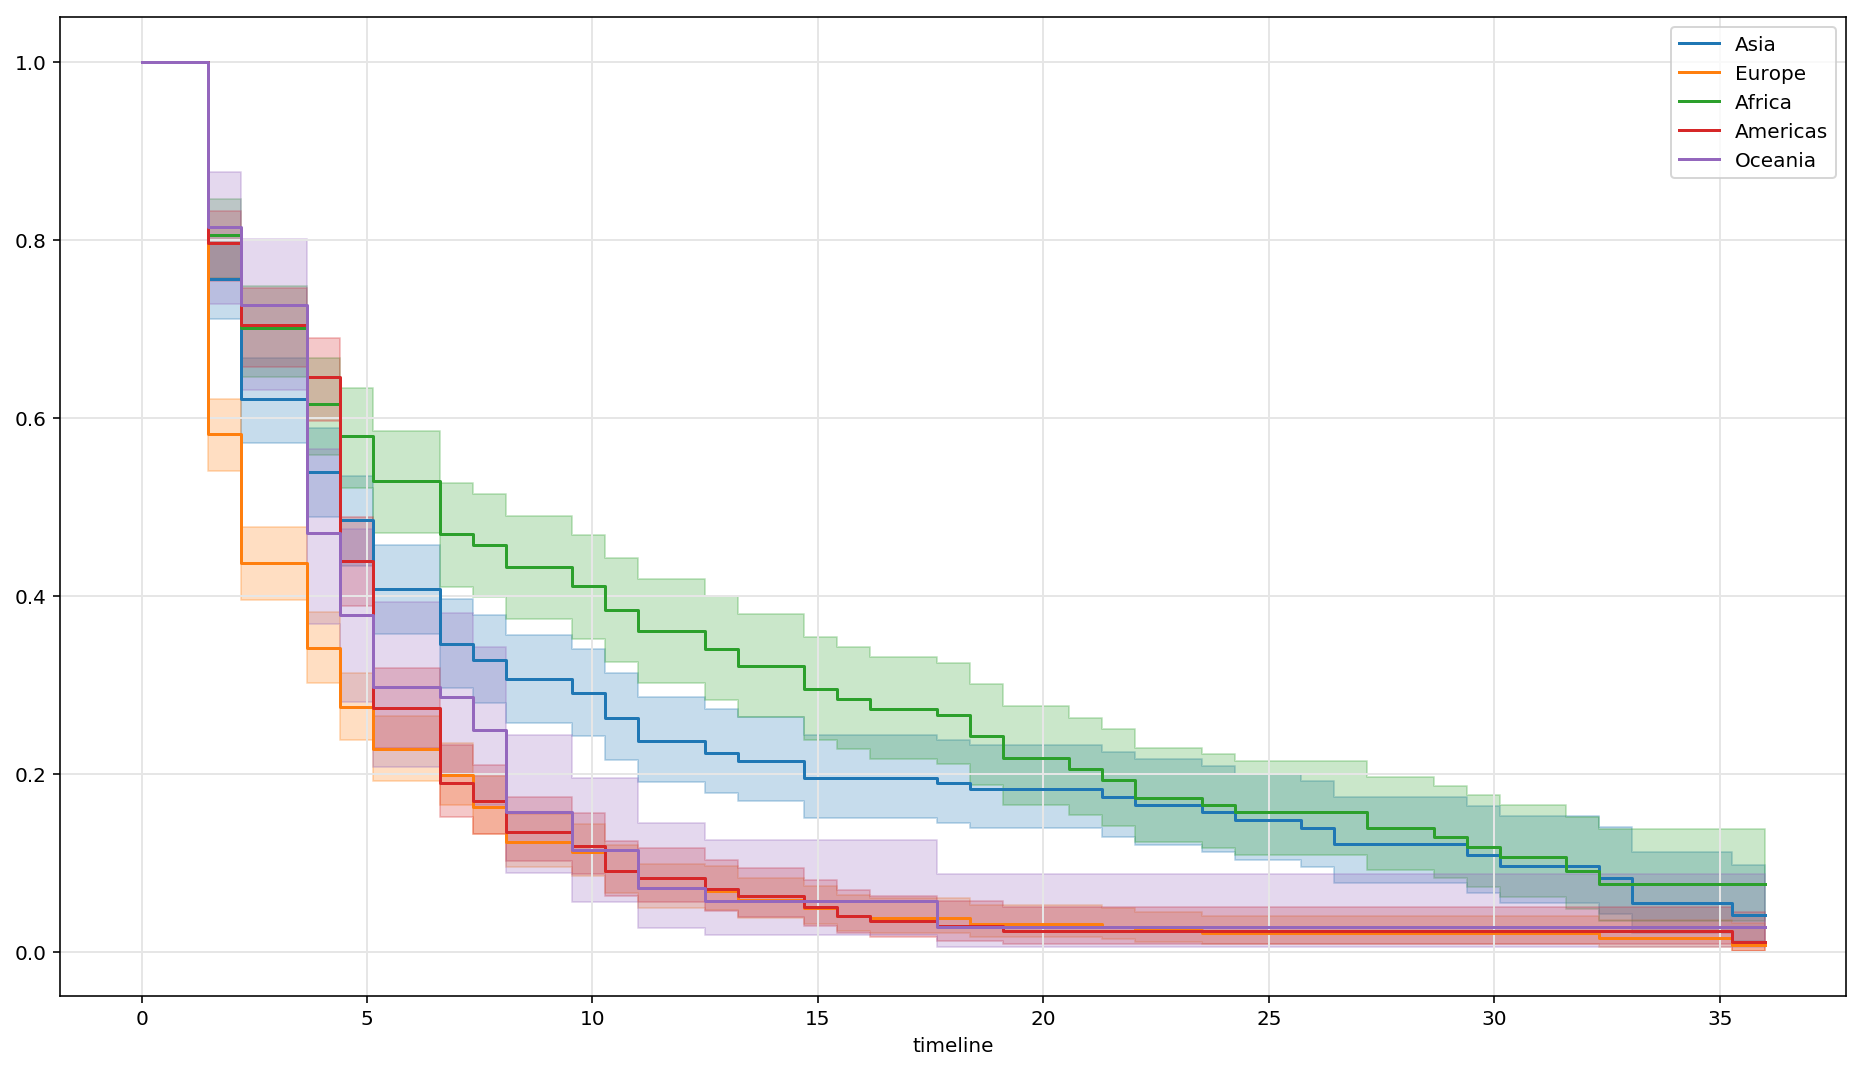

In [8]:
# plot survival curves for continents
# subsetting continents and plot multiple survival curves respectively,
# cut off the fit data after year 36
t = np.linspace(0,36)
ax = subplot(111)
for r in df['un_continent_name'].unique()[:]:
    ix = df['un_continent_name'] == r
    kmf.fit(T.loc[ix],E.loc[ix],timeline=t,label=r)
    kmf.plot(figsize=(16, 9),ax=ax)
    plt.grid(True, lw = 1, ls = '-', c = '.9')